In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
import fastai
from fastai.imports import *

from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
import skimage
from skimage.transform import*

/apps/software/standard/core/anaconda3/5.2.0/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
PATH = "/scratch/kk4ze/data_lowres_1100x1100_augmented_duplicated/"
sz=1100

In [4]:
torch.cuda.is_available()

True

In [5]:
torch.backends.cudnn.enabled

True

In [6]:
os.listdir(PATH)

['models',
 'preds_resnet50_1100_duplicates_TTA_staintools.csv',
 'tmp',
 'logpreds_resnet34_all_layers2200x2200_duplicates_TTA_staintools.npy',
 'valid',
 '.ipynb_checkpoints',
 'train']

In [7]:
files = os.listdir(f'{PATH}valid/Celiac')[:5]
files

['C04-17_05_12764_7763_horiz__0_0.jpg',
 'C12-63_03_10776_11106_vert__1_0.jpg',
 'C07-37_06_8055_8580_vert__0_0.jpg',
 'C03-12_01_4376_5379_vert__1_0.jpg',
 'C06-33_02_8189_5011_horiz__0_0.jpg']

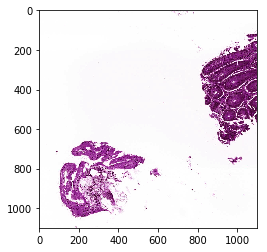

In [8]:
img = plt.imread(f'{PATH}valid/Celiac/{files[4]}')
plt.imshow(img);

In [9]:
arch=resnet50
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz),bs=8)


In [10]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [11]:
learn.fit(0.001, 3)

epoch      trn_loss   val_loss   accuracy                    
    0      0.585664   0.43688    0.798354  
    1      0.440239   0.388947   0.864198                     
    2      0.352033   0.380911   0.868313                     



[0.3809107071087684, 0.8683127574469327]

## Visualising Results

In [12]:
# This is the label for a val data
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2])

In [13]:
# from here we know that 'Celiac' is label 0 and 'EE' is label 1 and 'Normal' is label 2
data.classes

['Celiac', 'EE', 'Normal']

In [14]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(243, 3)

Most Correct Celiac


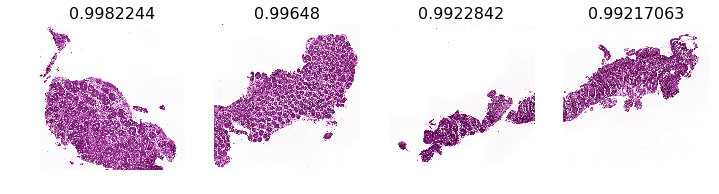

In [15]:
imr = ImageModelResults(data.val_ds, log_preds)
print('Most Correct Celiac')
imr.plot_most_correct(0)

Most Correct EE


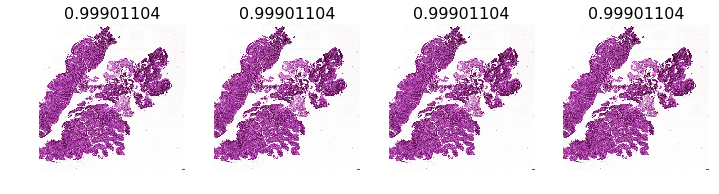

In [16]:
print('Most Correct EE')
imr.plot_most_correct(1)

Most Correct Normal


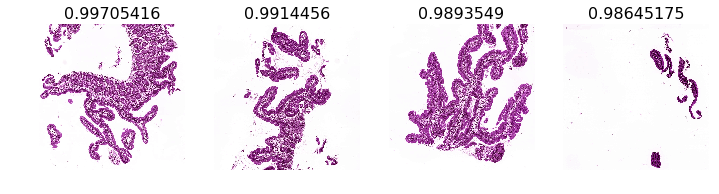

In [17]:
print('Most Correct Normal')
imr.plot_most_correct(2)

Most Incorrect Celiac


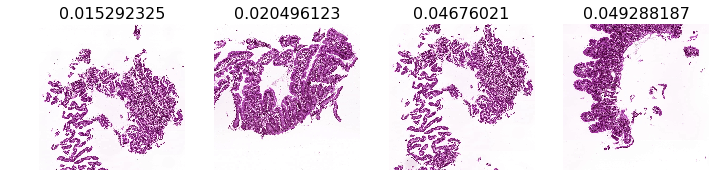

In [18]:
print('Most Incorrect Celiac')
imr.plot_most_incorrect(0)

Most Incorrect EE


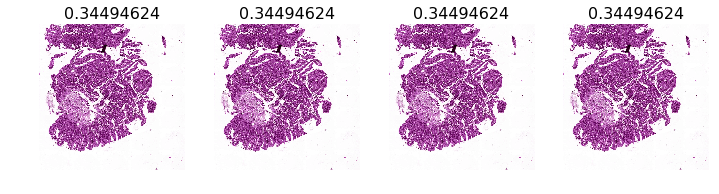

In [19]:
print('Most Incorrect EE')
imr.plot_most_incorrect(1)

Most Incorrect Normal


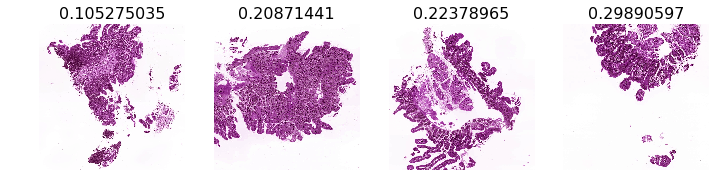

In [20]:
print('Most Incorrect Normal')
imr.plot_most_incorrect(2)

In [21]:
preds = np.argmax(log_preds, axis=1)

In [22]:
y = data.val_y

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[66  0 17]
 [ 0 78  6]
 [ 5  4 67]]


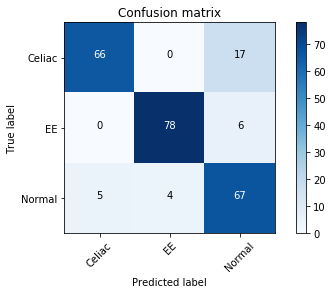

In [24]:
plot_confusion_matrix(cm, data.classes)

## Finding a optimum learning rate

In [25]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [26]:
lrf=learn.lr_find()

 68%|██████▊   | 90/132 [00:00<00:00, 281.55it/s, loss=1.37]


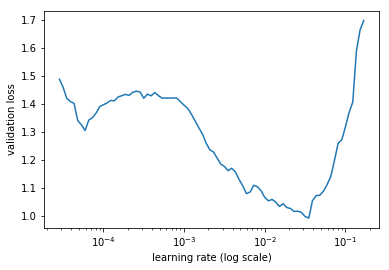

In [27]:
learn.sched.plot()

## Data Augmentation

In [28]:
# Using predefined augmentations transforms_top_down
tfms = tfms_from_model(resnet50, sz, aug_tfms=transforms_top_down, max_zoom=1.1)

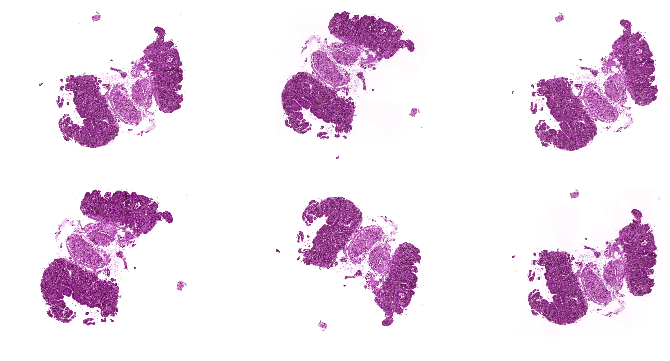

In [29]:
# Visualising the augmentation
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]
ims = np.stack([get_augs() for i in range(6)])
plots(ims, rows=2)

In [30]:
# Initializing the data with augmentation and learn method
data = ImageClassifierData.from_paths(PATH, tfms=tfms,bs=8)
learn = ConvLearner.pretrained(arch, data, precompute=False)
learn.precompute = False

In [31]:
lrf=learn.lr_find()

 78%|███████▊  | 103/132 [02:56<00:49,  1.70s/it, loss=4.18]

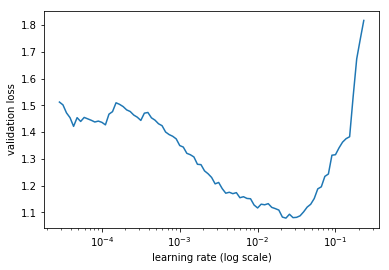

In [32]:
learn.sched.plot()

In [33]:
learn.fit(0.001, 5, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                    
    0      0.792516   0.568176   0.761317  
    1      0.648328   0.480654   0.82716                     
    2      0.606054   0.491712   0.8107                      
    3      0.549179   0.484759   0.794239                    
    4      0.544531   0.514098   0.728395                    


[0.514097513730634, 0.7283950619736816]

In [34]:
learn.save('1100_lastlayer_duplicated_resnet50_lowres_staintools')

In [35]:
learn.load('1100_lastlayer_duplicated_resnet50_lowres_staintools')

## Creating GradCam Heatmaps

In [37]:
class SaveFeatures():
    features=None
    def __init__(self, m): self.hook = m.register_forward_hook(self.hook_fn)
    def hook_fn(self, module, input, output): self.features = output
    def remove(self): self.hook.remove()


def plt_heatmap():
    
    m = nn.Sequential(*children(learn.model))
    figure = plt.figure(figsize=(20, 20))

    for i in range(6):
        subplot = figure.add_subplot(3, 3, i+1)
        subplot.axis('Off')

        x,y = next(iter(data.val_dl))
        x,y = x[None,i], y[None,i]
        vx = Variable(x.cuda(), requires_grad=True)
        dx = data.val_ds.denorm(x)[0]
        sfs = [SaveFeatures(o) for o in [m[-11][2]._modules['conv2']]]
        py = m(vx)
        for o in sfs: o.remove()
        feat = np.maximum(0,to_np(sfs[0].features[0]))
        vx = Variable(x.cuda(), requires_grad=True)
        py = np.exp(to_np(py)[0])
        params = list(m.parameters())
        weight_softmax = np.squeeze(params[-2].data.cpu().numpy())
        f2=np.dot(np.rollaxis(feat,0,3), weight_softmax[0])
        f2-=f2.min()
        f2/=f2.max()
        plt.imshow(dx)
        plt.imshow(scipy.misc.imresize(f2, dx.shape), alpha=0.5, cmap='hot');

/apps/software/standard/core/anaconda3/5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:33: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


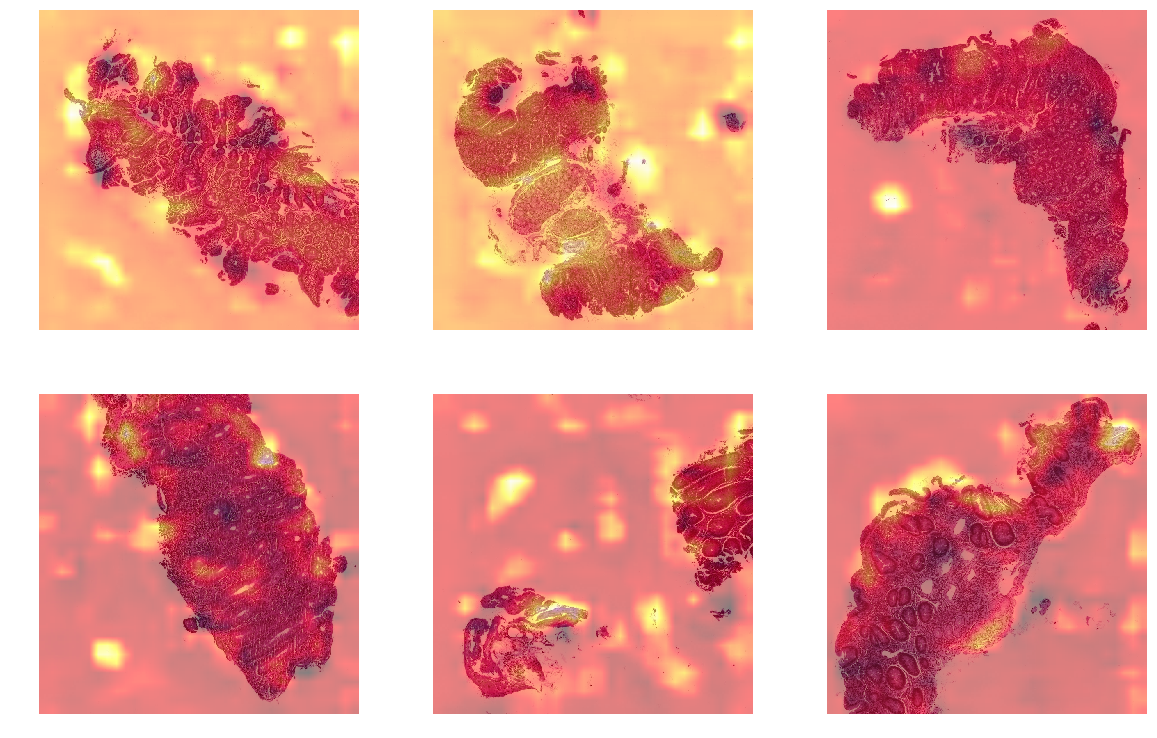

In [38]:
plt_heatmap()

## Unfreezing layers and using Differential learning rates

In [ ]:
# Unfreeze all layers for training
learn.unfreeze()

In [ ]:
lrf=learn.lr_find()

In [ ]:
learn.sched.plot()

In [ ]:
lr = (1e-2 + 1e-3)/2

In [ ]:
lr=np.array([lr/9,lr/3,lr])

In [ ]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

In [ ]:
learn.save('1100_lowres_resnet50_staintools_duplicated')

In [ ]:
learn.load('1100_lowres_resnet50_staintools_duplicated')

## Analyzing results

### Confusion Matrix and Accuracy with Test Time Augmentation

In [ ]:
# Getting log predictions with TTA
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y)

In [ ]:
log_preds.shape

In [ ]:
np.save('/scratch/kk4ze/data_lowres_1100x1100_augmented_duplicated/logpreds_resnet34_all_layers2200x2200_duplicates_TTA_staintools.npy', log_preds)

In [ ]:
log_preds = np.load('/scratch/kk4ze/data_lowres_1100x1100_augmented_duplicated/logpreds_resnet34_all_layers2200x2200_duplicates_TTA_staintools.npy')

In [ ]:
log_preds_mean = np.mean(log_preds, 0)

In [ ]:
preds = np.argmax(probs, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

In [ ]:
plot_confusion_matrix(cm, data.classes)

### Visualizing results with TTA

In [ ]:
imr = ImageModelResults(data.val_ds, log_preds_mean)
print('Most Correct Celiac')
imr.plot_most_correct(0)

In [ ]:
print('Most Correct EE')
imr.plot_most_correct(1)

In [ ]:
print('Most Correct Noraml')
imr.plot_most_correct(2)

In [ ]:
print('Most Incorrect Celiac')
imr.plot_most_incorrect(0)

In [ ]:
print('Most Incorrect EE')
imr.plot_most_incorrect(1)

In [ ]:
print('Most Incorrect Normal')
imr.plot_most_incorrect(2)

In [ ]:
print('Most Uncertain Celiac')
imr.plot_most_uncertain(0)

In [ ]:
print('Most Uncertain EE')
imr.plot_most_uncertain(1)

In [ ]:
print('Most Uncertain Normal')
imr.plot_most_uncertain(2)

### Confusion Matrix and Accuracy without Test Time Augmentation

In [ ]:
# Getting log predictions without TTA
log_preds = learn.predict()

In [ ]:
preds = np.argmax(log_preds, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

In [ ]:
plot_confusion_matrix(cm, data.classes)

## Saving predictions of the model with TTA

In [ ]:
np.exp(log_preds_mean)

In [ ]:
res = pd.DataFrame(np.exp(log_preds_mean))

In [ ]:
res['file'] = data.val_ds.fnames

In [ ]:
res.columns = ['Celiac', 'EE', 'Normal', 'FileName']

In [ ]:
res.to_csv('/scratch/kk4ze/data_lowres_1100x1100_augmented_duplicated/preds_resnet50_1100_duplicates_TTA_staintools.csv')

In [ ]:
res.head()